In [13]:
import tensorflow as tf

In [14]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss')<0.1):
      print("\nReached 90% accuracy so cancelling training!")
      self.model.stop_training = True

In [15]:
callbacks = myCallback()
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images/255.0
test_images=test_images/255.0

In [16]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [17]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.fit(training_images, training_labels, epochs=30, callbacks=[callbacks])

Train on 60000 samples
Epoch 1/30
60000/60000 [==============================] - 25s 420us/sample - loss: 0.4762

[1]
1


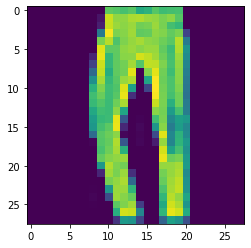

In [19]:
import matplotlib.pyplot as plt
x=5
plt.imshow(test_images[x])
classifications = model.predict(test_images)
print([i for i, j in enumerate(classifications[x]) if j ==   max(classifications[x])])
print(test_labels[x])